<>:32: SyntaxWarning: invalid escape sequence '\d'
<>:75: SyntaxWarning: invalid escape sequence '\d'
<>:32: SyntaxWarning: invalid escape sequence '\d'
<>:75: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_2550/3415818289.py:32: SyntaxWarning: invalid escape sequence '\d'
  cbar.set_label('Energy Level $E(x, \dot{x})$')
/tmp/ipykernel_2550/3415818289.py:75: SyntaxWarning: invalid escape sequence '\d'
  ax.set_ylabel('Velocity $\dot{x}$', fontsize=12)


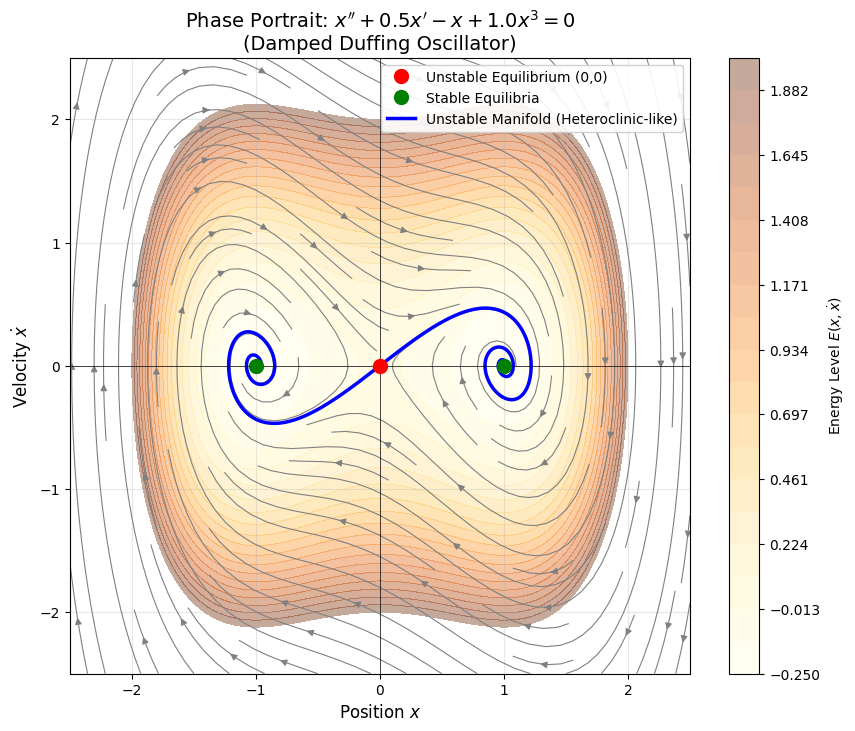

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# --- 1. System Parameters ---
delta = 0.5   # Damping (Friction)
epsilon = 1.0 # Nonlinearity strength
# Equation: x'' + delta*x' - x + epsilon*x^3 = 0

def duffing_system(state, t):
    x, v = state # x is position, v is velocity (x dot)
    dxdt = v
    # Acceleration = x - epsilon*x^3 - delta*v
    dvdt = x - epsilon * x**3 - delta * v
    return [dxdt, dvdt]

# --- 2. Setup the Plot Grid ---
x_range = np.linspace(-2.5, 2.5, 400)
v_range = np.linspace(-2.5, 2.5, 400)
X, V = np.meshgrid(x_range, v_range)

# --- 3. Calculate Energy for Background (Optional but helpful) ---
# E = 0.5*v^2 + (-0.5*x^2 + 0.25*epsilon*x^4)
Energy = 0.5 * V**2 - 0.5 * X**2 + 0.25 * epsilon * X**4

fig, ax = plt.subplots(figsize=(10, 8))

# Plot Energy Contours (The "W" shape landscape)
# We limit levels to visualize the wells clearly
cp = ax.contourf(X, V, Energy, levels=np.linspace(-0.25, 2, 20), cmap='YlOrBr', alpha=0.4)
cbar = plt.colorbar(cp)
cbar.set_label('Energy Level $E(x, \dot{x})$')

# --- 4. Plot Vector Field (Streamplot) ---
DX = V
DV = X - epsilon * X**3 - delta * V
# Normalize arrows for cleaner look
speed = np.sqrt(DX**2 + DV**2)
lw = 5 * speed / speed.max()
ax.streamplot(X, V, DX, DV, color='gray', density=1.2, linewidth=0.8, arrowsize=1)

# --- 5. Plot Equilibria ---
# Unstable Saddle at (0,0)
ax.plot(0, 0, 'ro', markersize=10, label='Unstable Equilibrium (0,0)', zorder=5)
# Stable Spirals at (+/- 1/sqrt(epsilon), 0) -> (+/- 1, 0) for epsilon=1
stable_x = 1.0 / np.sqrt(epsilon)
ax.plot([stable_x, -stable_x], [0, 0], 'go', markersize=10, label='Stable Equilibria', zorder=5)

# --- 6. CALCULATE AND PLOT THE "HETEROCLINIC" ORBITS ---
# This is the trajectory originating exactly from (0,0)
# We use the unstable eigenvector direction calculated in the previous chat.

# Eigenvalue lambda_plus
lambda_plus = (-delta + np.sqrt(delta**2 + 4)) / 2

# Small perturbation from (0,0) along the eigenvector
epsilon_start = 0.001
# Start slightly to the Right
start_right = [epsilon_start, lambda_plus * epsilon_start]
# Start slightly to the Left
start_left = [-epsilon_start, -lambda_plus * epsilon_start]

t = np.linspace(0, 20, 1000)

# Integrate forward in time
sol_right = odeint(duffing_system, start_right, t)
sol_left = odeint(duffing_system, start_left, t)

ax.plot(sol_right[:, 0], sol_right[:, 1], 'b-', linewidth=2.5, label='Unstable Manifold (Heteroclinic-like)')
ax.plot(sol_left[:, 0], sol_left[:, 1], 'b-', linewidth=2.5)

# --- 7. Formatting ---
ax.set_title(f"Phase Portrait: $x'' + {delta}x' - x + {epsilon}x^3 = 0$\n(Damped Duffing Oscillator)", fontsize=14)
ax.set_xlabel('Position $x$', fontsize=12)
ax.set_ylabel('Velocity $\dot{x}$', fontsize=12)
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.legend(loc='upper right', framealpha=0.9)
ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-2.5, 2.5)
plt.grid(True, alpha=0.3)

plt.show()